In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [327]:
df_port=pd.read_csv("Port_locations.csv")

In [329]:
df_port.shape

(5856, 3)

In [331]:
df=pd.read_csv("Ship_Uncleaned.csv")

In [333]:
df.shape

(4000, 6)

In [335]:
for df in [df_port, df]:
    df.columns = df.columns.str.strip().str.lower()

In [337]:
cols = ['company_name', 'ship_name']
df[cols] = df[cols].apply(lambda col: col.str.strip().str.lower())

In [339]:
df.head()

,company_name,ship_name,built_year,gt,dwt,size
0,prelude,offshore support vessel,2017,499167,394330,489 / 74
1,prelude,offshore support vessel,2017,499167,394330,489 / 74
2,prelude,offshore support vessel,2017,499167,394330,489 / 74
3,prelude,offshore support vessel,2017,499167,394330,489 / 74
4,prelude,offshore support vessel,2017,499167,394330,489 / 74


In [341]:
df[['length', 'width']] = (
    df['size']
    .str.split('/', expand=True) 
    .apply(lambda x: x.str.strip()) 
    .astype(int)                  
)

In [343]:
import datetime
df['age'] = datetime.datetime.now().year - df['built_year']


In [345]:
df.head()

,company_name,ship_name,built_year,gt,dwt,size,length,width,age
0,prelude,offshore support vessel,2017,499167,394330,489 / 74,489,74,8
1,prelude,offshore support vessel,2017,499167,394330,489 / 74,489,74,8
2,prelude,offshore support vessel,2017,499167,394330,489 / 74,489,74,8
3,prelude,offshore support vessel,2017,499167,394330,489 / 74,489,74,8
4,prelude,offshore support vessel,2017,499167,394330,489 / 74,489,74,8


In [347]:
df = df.drop(columns=['size'])

In [349]:
df.head()

,company_name,ship_name,built_year,gt,dwt,length,width,age
0,prelude,offshore support vessel,2017,499167,394330,489,74,8
1,prelude,offshore support vessel,2017,499167,394330,489,74,8
2,prelude,offshore support vessel,2017,499167,394330,489,74,8
3,prelude,offshore support vessel,2017,499167,394330,489,74,8
4,prelude,offshore support vessel,2017,499167,394330,489,74,8


In [351]:
df['risk_label'] = np.where(
    (df['dwt'] > 200000) | (df['gt'] > 150000) | (df['built_year'] < 2010),
    1,   
    0    
)

In [353]:
df["risk_label"].value_counts()

risk_label
1    2300
0    1700
Name: count, dtype: int64

In [355]:
df = df.drop(['company_name', 'ship_name'], axis=1)

In [357]:
df.head()

,built_year,gt,dwt,length,width,age,risk_label
0,2017,499167,394330,489,74,8,1
1,2017,499167,394330,489,74,8,1
2,2017,499167,394330,489,74,8,1
3,2017,499167,394330,489,74,8,1
4,2017,499167,394330,489,74,8,1


In [359]:
df.shape

(4000, 7)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   built_year  4000 non-null   int64
 1   gt          4000 non-null   int64
 2   dwt         4000 non-null   int64
 3   length      4000 non-null   int32
 4   width       4000 non-null   int32
 5   age         4000 non-null   int64
 6   risk_label  4000 non-null   int32
dtypes: int32(3), int64(4)
memory usage: 172.0 KB


In [363]:
df.isnull().sum()

built_year    0
gt            0
dwt           0
length        0
width         0
age           0
risk_label    0
dtype: int64

In [365]:
df.describe()

,built_year,gt,dwt,length,width,age,risk_label
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2011.660000,128046.050000,179971.460000,319.180000,50.015000,13.340000,0.575000
std,7.165699,43045.106352,88786.478168,32.416513,6.723546,7.165699,0.494405
min,1976.000000,89991.000000,7900.000000,272.000000,36.000000,2.000000,0.000000
25%,2009.000000,94761.750000,106146.250000,292.000000,45.000000,9.000000,0.000000
50%,2012.000000,113883.000000,179217.500000,300.000000,48.000000,13.000000,1.000000
75%,2016.000000,155140.500000,231111.750000,334.250000,57.000000,16.000000,1.000000
max,2023.000000,499167.000000,400694.000000,489.000000,74.000000,49.000000,1.000000


In [367]:
duplicates = df.duplicated().sum()

In [369]:
duplicates

3800

In [371]:
df = df.drop_duplicates()

In [373]:
df.shape

(200, 7)

In [375]:
df["risk_label"].value_counts()

risk_label
1    115
0     85
Name: count, dtype: int64

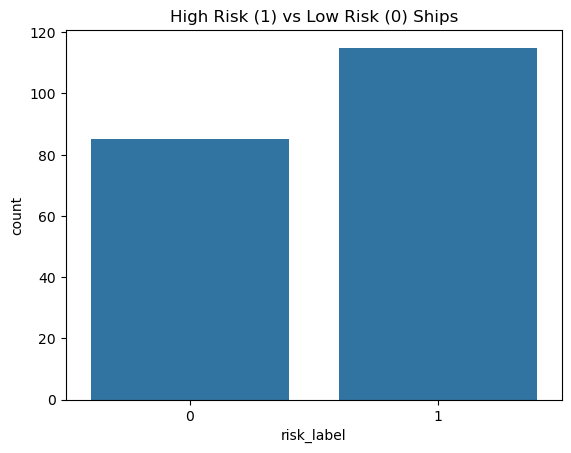

In [377]:
sns.countplot(data=df, x='risk_label')
plt.title("High Risk (1) vs Low Risk (0) Ships")
plt.show()

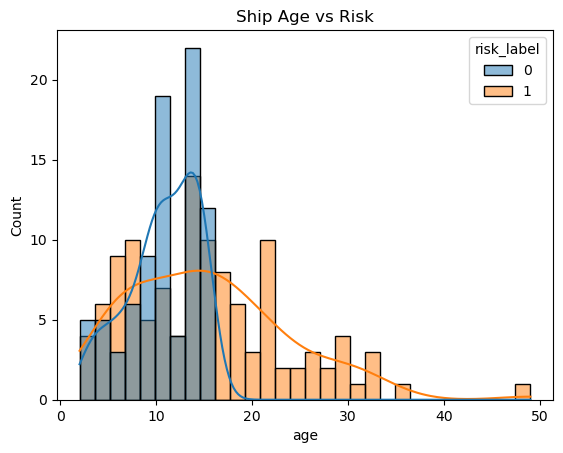

In [379]:
sns.histplot(data=df, x='age', hue='risk_label', bins=30, kde=True)
plt.title("Ship Age vs Risk")
plt.show()

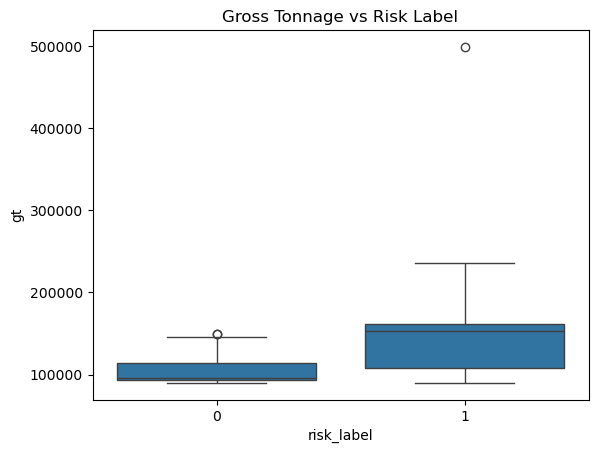

In [381]:
sns.boxplot(data=df, x='risk_label', y='gt')
plt.title("Gross Tonnage vs Risk Label")
plt.show()

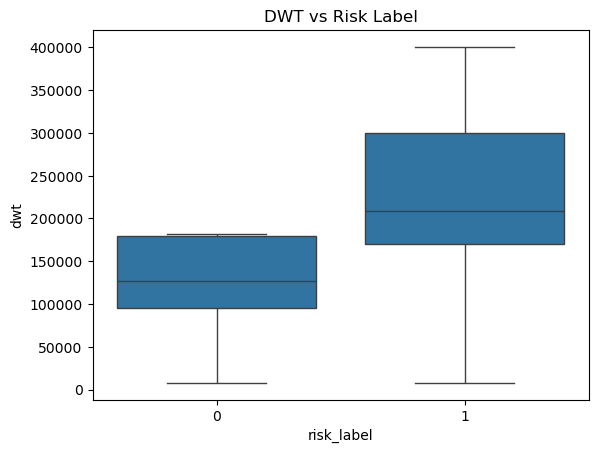

In [383]:
sns.boxplot(data=df, x='risk_label', y='dwt')
plt.title("DWT vs Risk Label")
plt.show()

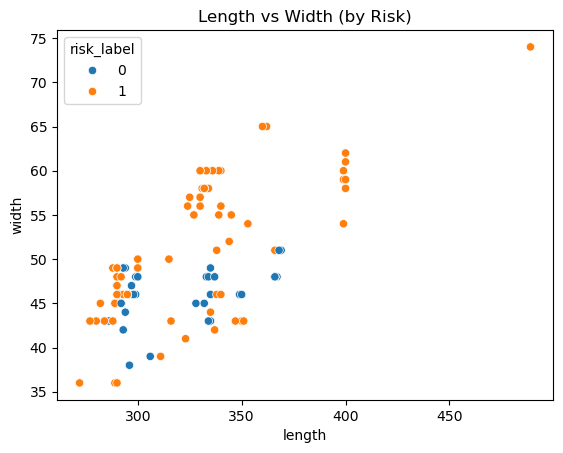

In [385]:
sns.scatterplot(data=df, x='length', y='width', hue='risk_label')
plt.title("Length vs Width (by Risk)")
plt.show()

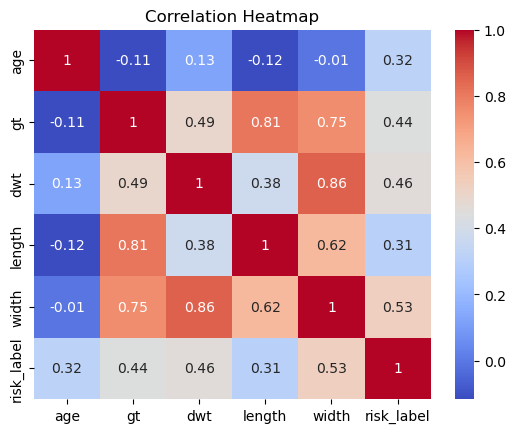

In [213]:
corr = df[['age','gt','dwt','length','width','risk_label']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [399]:
X=df.drop('risk_label',axis=1)
y=df['risk_label']

In [401]:
df = df.reset_index(drop=True)

In [403]:
X.head()

,built_year,gt,dwt,length,width,age
0,2017,499167,394330,489,74,8
1,2023,236184,240000,399,60,2
2,2019,232618,228149,400,62,6
3,2019,228741,228111,400,61,6
4,2019,219688,198937,400,59,6


In [405]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: risk_label, dtype: int32

In [407]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [409]:
X_train.shape

(150, 6)

In [411]:
X_test.shape

(50, 6)

In [422]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [437]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [462]:
models={
    "Logisitic Regression":LogisticRegression()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    model_train_precision = precision_score(y_train, y_train_pred) 
    model_train_recall = recall_score(y_train, y_train_pred) 
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred) 
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8733
- F1 score: 0.8744
- Precision: 0.9383
- Recall: 0.8444
- Roc Auc Score: 0.8806
----------------------------------
Model performance for Test set
- Accuracy: 0.8000
- F1 score: 0.8000
- Precision: 0.8000
- Recall: 0.8000
- Roc Auc Score: 0.8000


